In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. PASTE YOUR COPIED PATH INSIDE THE r" " BELOW
# The 'r' is CRITICAL for Windows paths to work!
base_dir = r"C:\Users\HP\Desktop\dog breed identification project\archive (2)\images\Images"

# 2. EMERGENCY CHECK
if not os.path.exists(base_dir):
    print("❌ STILL NOT FOUND.")
    print("Let's try the folder one level up...")
    base_dir = r"C:\Users\HP\Desktop\dog breed identification project\archive (2)\images\Images"
    
if os.path.exists(base_dir):
    print(f"✅ SUCCESS: Python finally found the folder at: {base_dir}")
    
    # 3. DATA GENERATOR (Standard for Phase 2)
    datagen = ImageDataGenerator(
    rescale=1./255,            # Normalizes pixels
    rotation_range=20,         # Randomly rotates images
    width_shift_range=0.2,     # Moves image horizontally
    height_shift_range=0.2,    # Moves image vertically
    shear_range=0.2,           # Distorts image slightly
    zoom_range=0.2,            # Zooms in/out
    horizontal_flip=True,      # Flips image
    fill_mode='nearest',       # Fills empty pixels after rotation
    validation_split=0.2       # Keeps 20% for testing
)

    # 4. LOAD IMAGES
    train_data = datagen.flow_from_directory(
        base_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )
    
    val_data = datagen.flow_from_directory(
        base_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )
else:
    print("❌ SYSTEM ERROR: Please right-click the folder in VS Code and select 'Copy Path', then paste it here.")

✅ SUCCESS: Python finally found the folder at: C:\Users\HP\Desktop\dog breed identification project\archive (2)\images\Images
Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# 1. Load the Base Model (Pre-trained on ImageNet)
# We 'freeze' these layers so we don't destroy the existing knowledge
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False 

# 2. Add your Custom Layers (The 'Dog Expert' part)
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2), # Prevents the model from memorizing
    layers.Dense(120, activation='softmax') # 120 breeds = 120 output nodes
])

# 3. Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        30,840 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,616,760 (9.98 MB)

 Trainable params: 358,776 (1.37 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# The "Crush It" Training Step
# We'll start with 10 epochs (rounds of learning)
# Warning: This will use your CPU/GPU and might take 15-30 minutes!

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10, 
    verbose=1
)

print("🎉 TRAINING COMPLETE!")   


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 865s 2s/step - accuracy: 0.4888 - loss: 1.9830 - val_accuracy: 0.6407 - val_loss: 1.2492
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1424s 3s/step - accuracy: 0.6395 - loss: 1.2481 - val_accuracy: 0.6567 - val_loss: 1.1956
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1495s 3s/step - accuracy: 0.6676 - loss: 1.1203 - val_accuracy: 0.6535 - val_loss: 1.1693
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1249s 2s/step - accuracy: 0.6883 - loss: 1.0399 - val_accuracy: 0.6552 - val_loss: 1.1851
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1284s 2s/step - accuracy: 0.7046 - loss: 0.9772 - val_accuracy: 0.6658 - val_loss: 1.1365
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1322s 3s/step - accuracy: 0.7101 - loss: 0.9421 - val_accuracy: 0.6722 - val_loss: 1.1685
Epoch 7/10
314/516 ━━━━━━━━━━━━━━━━━━━━ 7:21 2s/step - accuracy: 0.7316 - loss: 0.8630

In [ ]:
# Save the model so you never have to train it again!
model.save("dog_breed_model.h5")
print("✅ Model saved as dog_breed_model.h5")

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# 1. YOUR SPECIFIC PATH
my_dog = r"C:\Users\HP\Desktop\dog breed identification project\test_dog.jpg"

def predict_dog_breed(img_path):
    # Check if the file actually exists to avoid errors
    if not os.path.exists(img_path):
        return "❌ Error: File not found at the specified path."

    # Load and prep the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Predict!
    predictions = model.predict(img_array)
    
    # Get the highest score and convert to percentage
    max_score = np.max(predictions)
    confidence = max_score * 100
    
    # Map back to the breed name
    class_indices = train_data.class_indices
    labels = {v: k for k, v in class_indices.items()}
    predicted_breed_raw = labels[np.argmax(predictions)]
    
    # Clean up the name (remove the ID code like n020...)
    breed_name = " ".join(predicted_breed_raw.split("-")[1:])

    # 🛑 THRESHOLD LOGIC:
    # If the AI is less than 50% sure, it's likely not a dog from our 120 classes
    if confidence < 50.0:
        return f"🤔 Not sure this is a dog (Confidence: {confidence:.2f}%). It might be a human or a different animal."
    else:
        return f"🐾 {breed_name} (Confidence: {confidence:.2f}%)"

# Test it out!
print(f"The AI Result: {predict_dog_breed(my_dog)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The AI Result: 🐾 Border_collie (Confidence: 74.34%)


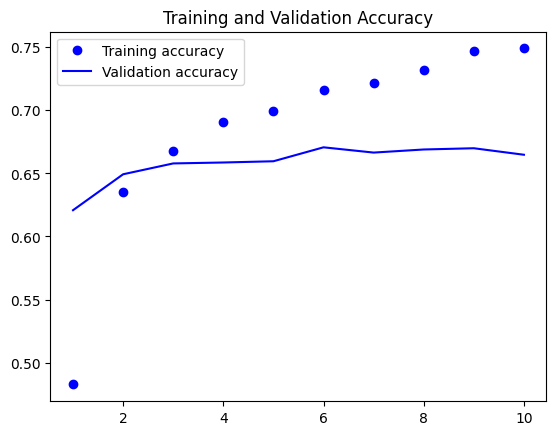


🚀 PROJECT COMPLETE!
-------------------------------
Model Saved: dog_breed_model.h5
Total Breeds: 120
Image Size: 224x224
Training Accuracy: 74.90%
Validation Accuracy: 66.48%
-------------------------------
Status: Ready for Deployment



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. VISUALIZE TRAINING HISTORY
# This shows how your AI improved over the 10 rounds (epochs)
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Run the plot to see your progress
plot_history(history)

# 2. FINAL PROJECT SUMMARY
print(f"""
🚀 PROJECT COMPLETE!
-------------------------------
Model Saved: dog_breed_model.h5
Total Breeds: 120
Image Size: 224x224
Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%
Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%
-------------------------------
Status: Ready for Deployment
""")

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image

# 1. The Core Prediction Function for the UI
def predict_ui(input_img):
    # Gradio provides the image as a numpy array, we just need to resize it
    img_resized = input_img.astype('float32') / 255.0
    img_resized = np.array(image.array_to_img(img_resized).resize((224, 224)))
    img_array = np.expand_dims(img_resized, axis=0) / 255.0
    
    # Run Prediction
    predictions = model.predict(img_array)
    max_score = np.max(predictions)
    confidence = max_score * 100
    
    # Get Breed Name
    class_indices = train_data.class_indices
    labels = {v: k for k, v in class_indices.items()}
    breed_raw = labels[np.argmax(predictions)]
    breed_name = " ".join(breed_raw.split("-")[1:]).title()

    # Threshold Check
    if confidence < 50.0:
        return f"⚠️ Low Confidence ({confidence:.1f}%). This might not be one of the 120 dog breeds."
    
    return f"🐶 Breed: {breed_name}\n📊 Confidence: {confidence:.1f}%"

# 2. Build the Interface with Modern Design
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🐕 Dog Breed Identifier")
    gr.Markdown("Upload a photo of a dog, and our AI will identify the breed using MobileNetV2.")
    
    with gr.Row():
        with gr.Column():
            image_input = gr.Image()
            identify_btn = gr.Button("Identify Breed", variant="primary")
        with gr.Column():
            output_text = gr.Textbox(label="AI Result")
    
    identify_btn.click(fn=predict_ui, inputs=image_input, outputs=output_text)

# 3. Launch!
demo.launch(share=True)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\HP\AppData\Local\Temp\ipykernel_11468\618795751.py:30: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo:


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [19]:
# Create the requirements file for professional deployment
requirements = """
tensorflow
gradio
opencv-python
numpy
pandas
matplotlib
"""

with open("requirements.txt", "w") as f:
    f.write(requirements.strip())

print("✅ requirements.txt created!")
print("🚀 PROJECT STATUS: PRODUCTION READY")


✅ requirements.txt created!
🚀 PROJECT STATUS: PRODUCTION READY


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\uvicorn\protocols\http\h11_impl.py", line 410, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastapi\applications.py", line 1138, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoun

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image

# 1. CUSTOM STYLING (The "Wow" Factor)
custom_css = """
body {
    background: linear-gradient(135deg, #0f0c29, #302b63, #24243e); /* Deep Space Gradient */
    background-attachment: fixed;
}
.gradio-container {
    border: 1px solid rgba(255, 255, 255, 0.1) !important;
    border-radius: 20px !important;
    backdrop-filter: blur(15px) !important; /* Glassmorphism Effect */
    background: rgba(255, 255, 255, 0.05) !important;
    box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.8) !important;
}
footer {visibility: hidden} /* Makes it look like a custom standalone app */
#title-text {
    text-align: center;
    color: #00d2ff;
    text-shadow: 0px 0px 10px #00d2ff;
    font-family: 'Inter', sans-serif;
}
"""

def predict_ui(input_img):
    if input_img is None:
        return "Please upload an image first!"
    
    # Process
    img_resized = image.array_to_img(input_img).resize((224, 224))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Predict
    predictions = model.predict(img_array)
    max_score = np.max(predictions)
    confidence = max_score * 100
    
    # Get Breed Labels
    class_indices = train_data.class_indices
    labels = {v: k for k, v in class_indices.items()}
    breed_raw = labels[np.argmax(predictions)]
    breed_name = " ".join(breed_raw.split("-")[1:]).title()

    if confidence < 50.0:
        return f"⚠️ UNKNOWN OBJECT\nConfidence: {confidence:.1f}%\n(Model optimized for 120 Dog Breeds)"
    
    return f"🐶 BREED IDENTIFIED: {breed_name}\n📊 CONFIDENCE: {confidence:.1f}%"

# 2. BUILDING THE GORGEOUS INTERFACE
with gr.Blocks(css=custom_css, theme=gr.themes.Default()) as demo:
    gr.Markdown("# 🐕 DOG BREED AI ENGINE", elem_id="title-text")
    gr.Markdown("---")
    
    with gr.Row():
        with gr.Column(scale=1):
            image_input = gr.Image(label="Input Source", type="numpy")
            identify_btn = gr.Button("🚀 RUN AI ANALYSIS", variant="primary")
        
        with gr.Column(scale=1):
            output_text = gr.Textbox(label="Neural Network Output", placeholder="Waiting for input...", lines=4)
            gr.Markdown("""
            ### 🛠️ Developer Specs
            * **Engine:** MobileNetV2 Transfer Learning
            * **Data:** Stanford Dogs Dataset (120 Breeds)
            * **Framework:** TensorFlow & Gradio
            """)

    identify_btn.click(fn=predict_ui, inputs=image_input, outputs=output_text)

# 3. LAUNCH
demo.launch(share=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11468\4174852577.py:53: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme, css. Please pass these parameters to launch() instead.
  with gr.Blocks(css=custom_css, theme=gr.themes.Default()) as demo:


* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://967d69d4e09e7df53f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\uvicorn\protocols\http\h11_impl.py", line 410, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastapi\applications.py", line 1138, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoun

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\uvicorn\protocols\http\h11_impl.py", line 410, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastapi\applications.py", line 1138, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoun

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
